<a href="https://colab.research.google.com/github/SaurabhSRP/EV-Range-Prediction/blob/main/Electric_Vehicle_Range_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

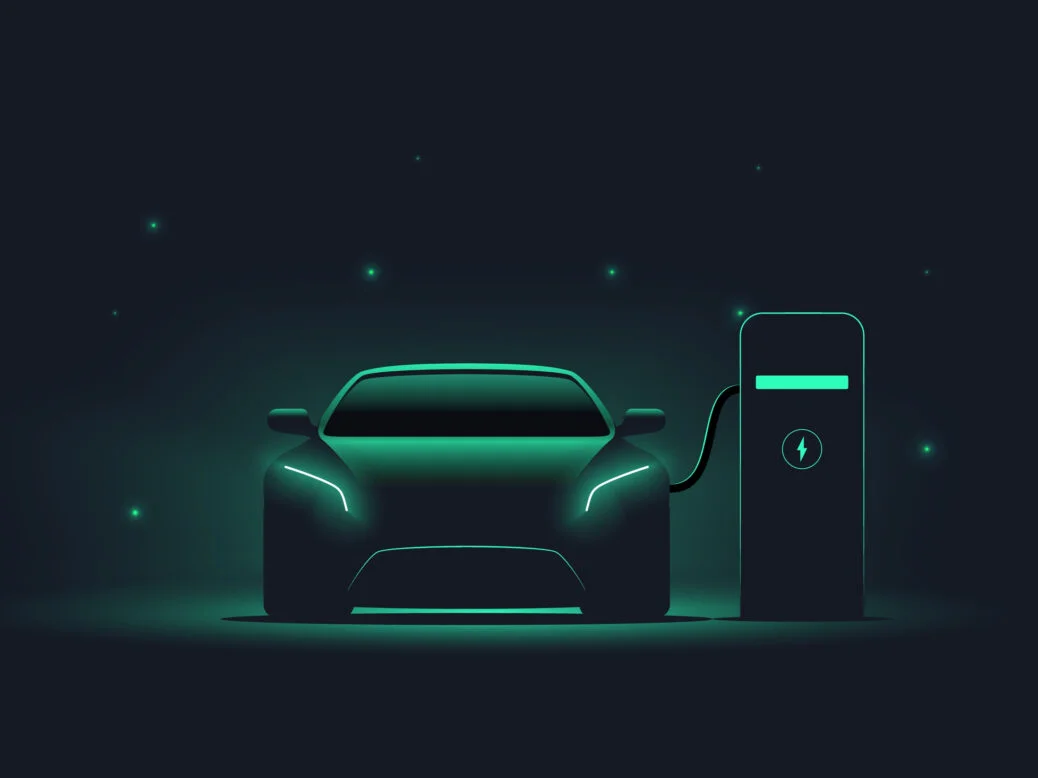

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/SaurabhSRP/EV-Range-Prediction/main/evdataset.csv")
df.head()

,id,Make,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Total Power,Total Torque,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,185,390,168,350,Rear,77.4,11.0,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,160,330,215,520,AWD,69.7,11.0,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,260,415,500,850,AWD,93.4,11.0,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,190,470,250,430,Rear,83.9,11.0,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,160,450,150,310,Rear,82.0,11.0,55,570,4261,1809,1568,2771,2300,447,385,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Make                         194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

###We dont need the ID and Link column for our ML model so lets drop them

In [5]:
df.drop(['id','link'],axis=1,inplace=True)

In [6]:
df.isnull().sum()

Make                           0
City - Cold Weather            0
Highway - Cold Weather         0
Combined - Cold Weather        0
City - Mild Weather            0
Highway - Mild Weather         0
Combined - Mild Weather        0
Acceleration 0 - 100 km/h      0
Top Speed                      0
Electric Range                 0
Total Power                    0
Total Torque                   0
Drive                          0
Battery Capacity               0
Charge Power                   0
Charge Speed                   0
Fastcharge Speed               0
Length                         0
Width                          0
Height                         0
Wheelbase                      0
Gross Vehicle Weight (GVWR)    0
Max. Payload                   0
Cargo Volume                   0
Seats                          0
dtype: int64

#**Lets understand the features of the dataset in more details**

####**id** - unique IDs of all records
####**Make** - Vehicle Makers
####**link** - Source URL
####**City - Cold Weather** - range in Km under cold weather conditions (-10 degrees) in cities
####**Highway - Cold Weather** - range in Km under cold weather conditions (-10 degrees) on highways
####**Combined - Cold Weather** - range in Km under cold weather conditions (-10 degrees) combined
####**City - Mild Weather** - range in Km under mild weather conditions (23 degrees) in cities
####**Highway - Mild Weather** - range in Km under mild weather conditions (23 degrees) on highways
####**Combined - Mild Weather** - range in Km under mild weather conditions (23 degrees) combined
####**Acceleration 0 - 100 km/h** -acceleration from 0 to 100 Km per hr in seconds
####**Top Speed** - Top speed in Km/h
####**Electric Range** - Advertised electric range in Km
####**Total Power** - Total motor power
####**Total Torque** - Total torque by motor
####**Drive** - Rear, Front, AWD
####**Battery Capacity** - Total capacity of the battery in KW
####**Charge Power** - KW AC charging power
####**Charge Speed** - KM/H
####**Fastcharge Speed** - KM/H
####**Length** - Car lengths in mm
####**Width** - Car width in mm
####**Height** - Car height in mm
####**Wheelbase** - Wheelbase in mm
####**Gross Vehicle Weight (GVWR)** - Gross weight of the car in Kg
####**Max. Payload** - Maxium payload in kgs
####**Cargo Volume** -Cargo volume of the car in litters
####**Seats** - No. of seats

#**DATA VIZ/ EDA**

###**1) Categorical features**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Make                         194 non-null    object 
 1   City - Cold Weather          194 non-null    int64  
 2   Highway - Cold Weather       194 non-null    int64  
 3   Combined - Cold Weather      194 non-null    int64  
 4   City - Mild Weather          194 non-null    int64  
 5   Highway - Mild Weather       194 non-null    int64  
 6   Combined - Mild Weather      194 non-null    int64  
 7   Acceleration 0 - 100 km/h    194 non-null    float64
 8   Top Speed                    194 non-null    int64  
 9   Electric Range               194 non-null    int64  
 10  Total Power                  194 non-null    int64  
 11  Total Torque                 194 non-null    int64  
 12  Drive                        194 non-null    object 
 13  Battery Capacity    

In [8]:
categorical_features=['Make','Drive','Seats','Charge Power']


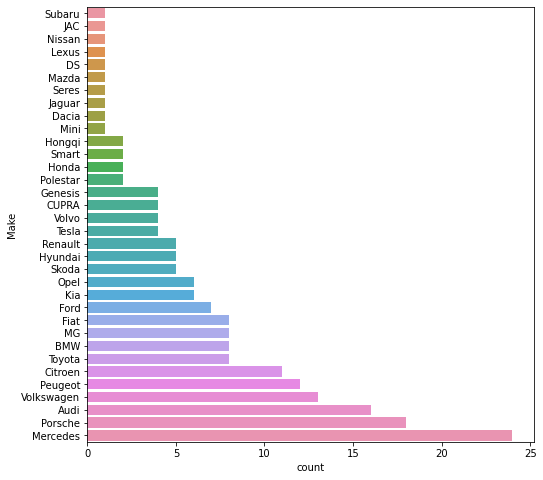

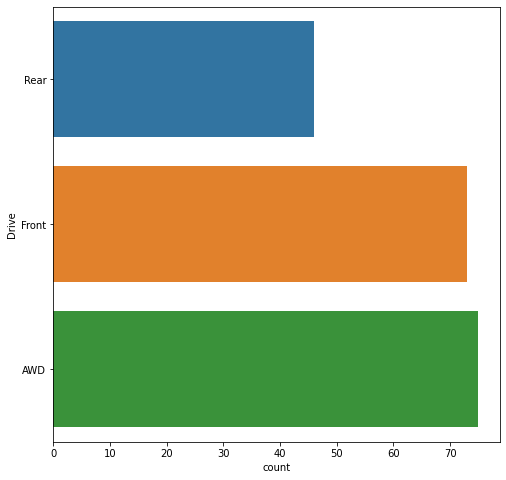

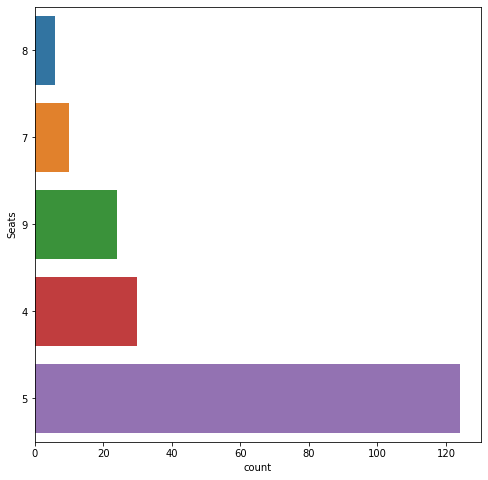

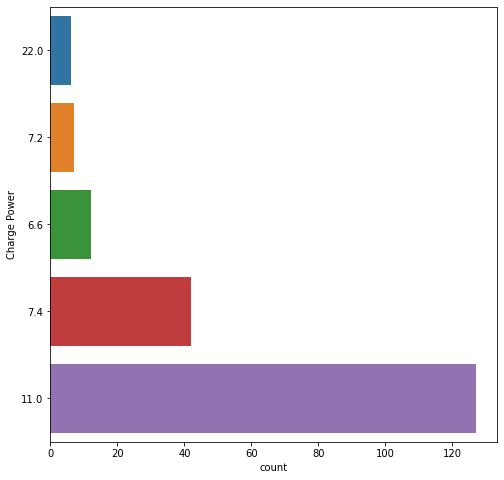

In [9]:
for feature in categorical_features:
  plt.figure(figsize=(8,8))
  sns.countplot(y=feature,data=df,order=df[feature].value_counts().sort_values().index)

###**Observations**
####1) Mercedes , Porsche , Audi , Volkswagen , Peugot are the top 5 manufacturers who have the most models 
####2) Majority of the models have AWD and Front wheel drive 
####3) Ideally from our dataset all vehicles are 5 seaters.
####4) 11 Kw/h AC is used by most of the EVs for charging 

##Lets check what is Median Electric range for Front , Rear, AWD drive mode 

In [10]:
drive=['AWD','Rear','Front']
for x in drive:
  data=df[df['Drive']== x]
  print("The Median Electric range for {} is :{}".format(x,data['Electric Range'].describe()[5]))


The Median Electric range for AWD is :400.0
The Median Electric range for Rear is :390.0
The Median Electric range for Front is :260.0


####Looks like Rear wheel drive and AWD , provide better Range compared to Front wheel drive

##Similarly lets check the median electric range based on no. of seats

In [11]:
Seat=[4,5,7,8,9]
for x in Seat:
  data=df[df['Seats']== x]
  print("The Median Electric range for {} seats is : {}".format(x,data['Electric Range'].describe()[5]))


The Median Electric range for 4 seats is : 402.5
The Median Electric range for 5 seats is : 365.0
The Median Electric range for 7 seats is : 317.5
The Median Electric range for 8 seats is : 260.0
The Median Electric range for 9 seats is : 220.0


###It is clearly evident that as no. of seats increase the Electric Range also decreases and the weight of the vehicle increases 

###**1) Numerical features**

In [12]:
numerical_feature=[feature for feature in df.columns if df[feature].dtype!='object']

In [13]:
numerical_feature.remove('Seats') ##Seat is a categorical feature so we are removing it from our list
numerical_feature.remove('Charge Power')

In [14]:
numerical_feature

['City - Cold Weather',
 'Highway - Cold Weather',
 'Combined - Cold Weather',
 'City - Mild Weather',
 'Highway - Mild Weather',
 'Combined - Mild Weather',
 'Acceleration 0 - 100 km/h',
 'Top Speed',
 'Electric Range',
 'Total Power',
 'Total Torque',
 'Battery Capacity',
 'Charge Speed',
 'Fastcharge Speed',
 'Length',
 'Width',
 'Height',
 'Wheelbase',
 'Gross Vehicle Weight (GVWR)',
 'Max. Payload',
 'Cargo Volume']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(

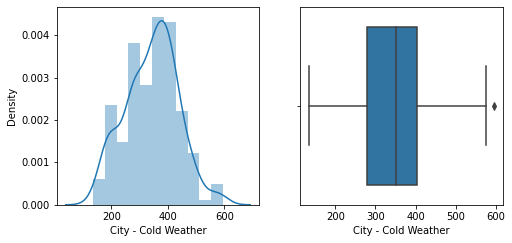

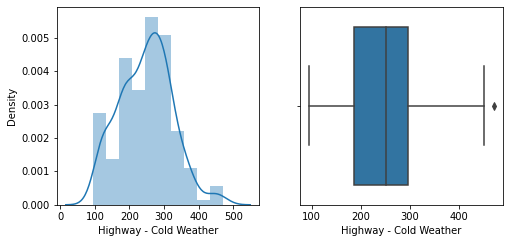

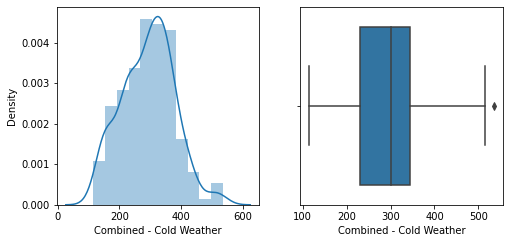

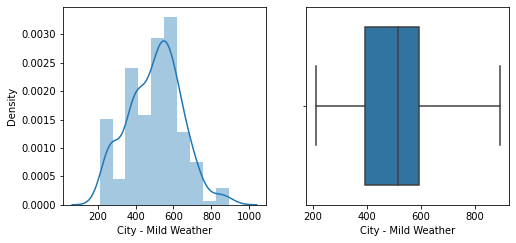

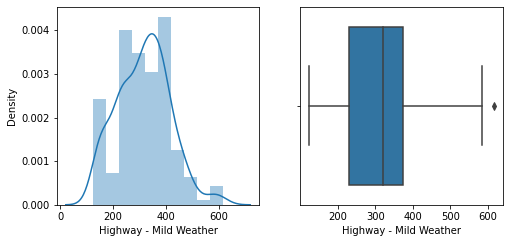

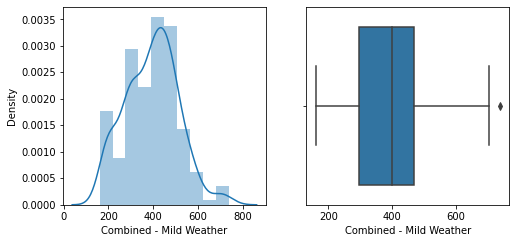

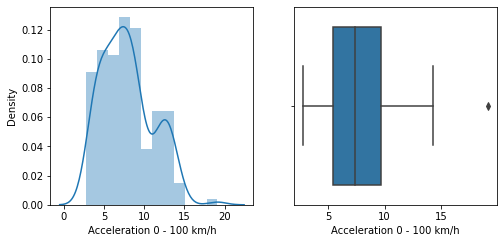

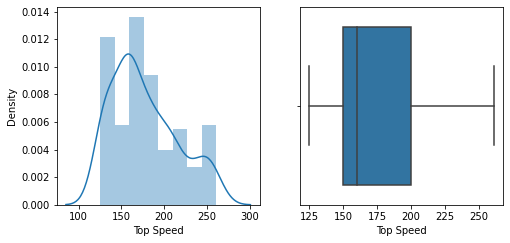

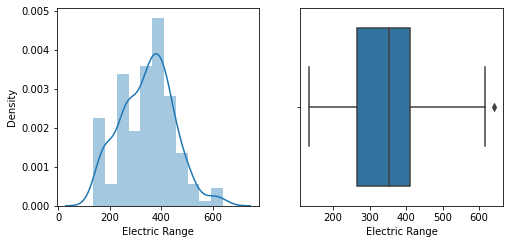

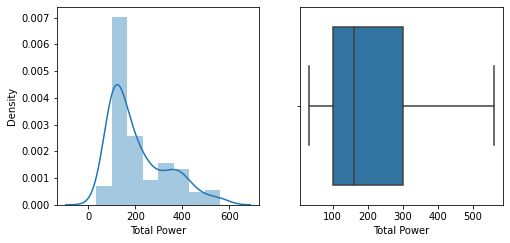

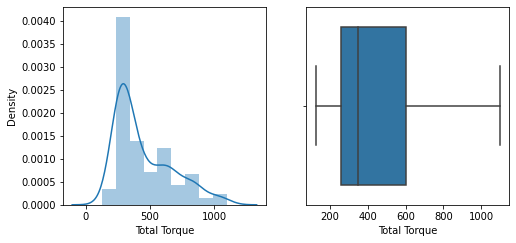

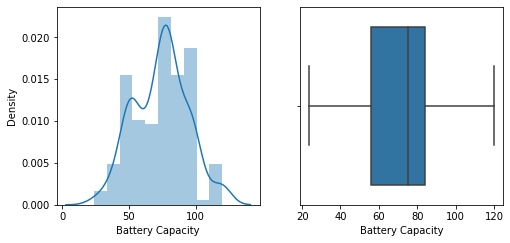

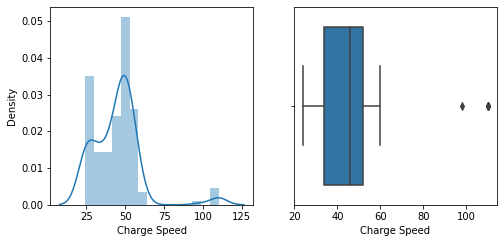

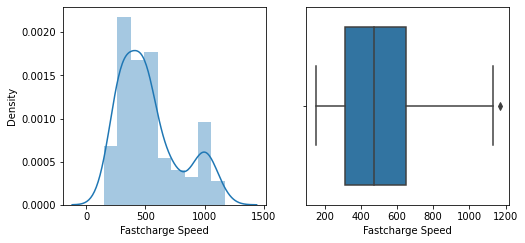

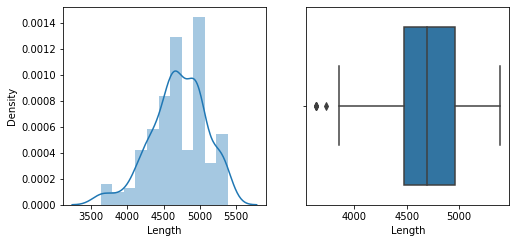

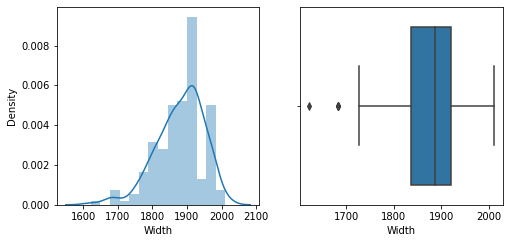

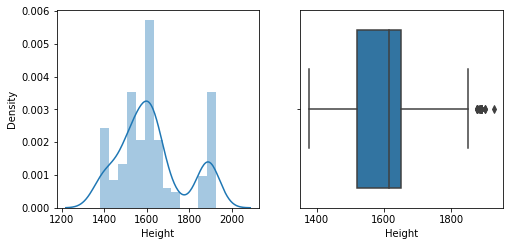

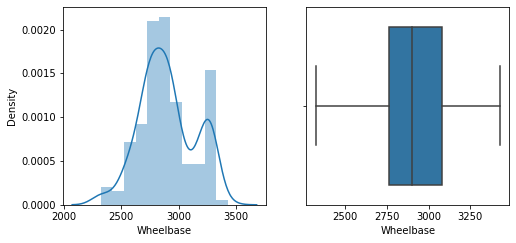

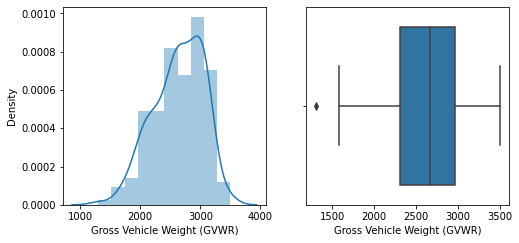

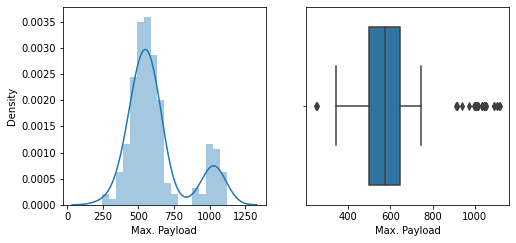

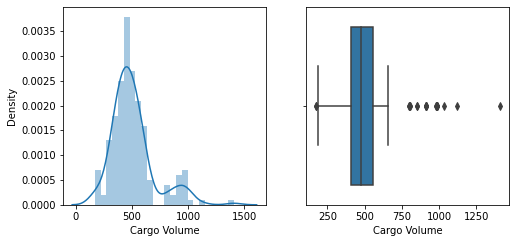

In [15]:
for feature in numerical_feature:
  plt.figure(figsize=(8,8))
  plt.subplot(2,2,1)
  sns.distplot(df[feature],kde=True)

  plt.subplot(2,2,2)
  sns.boxplot(df[feature])

##Observations

####1)Cargo Volumne is right skewed distribution
####2)Max payload seems to have two different category of distribution
####3) Charge speed is also has right skewed distribution


##Lets see the relationship between numerical data w.r.t Electric Range and other feature and simplest way to do that is by using pairplot

As we have lot of feature we will be using only lower triangle 

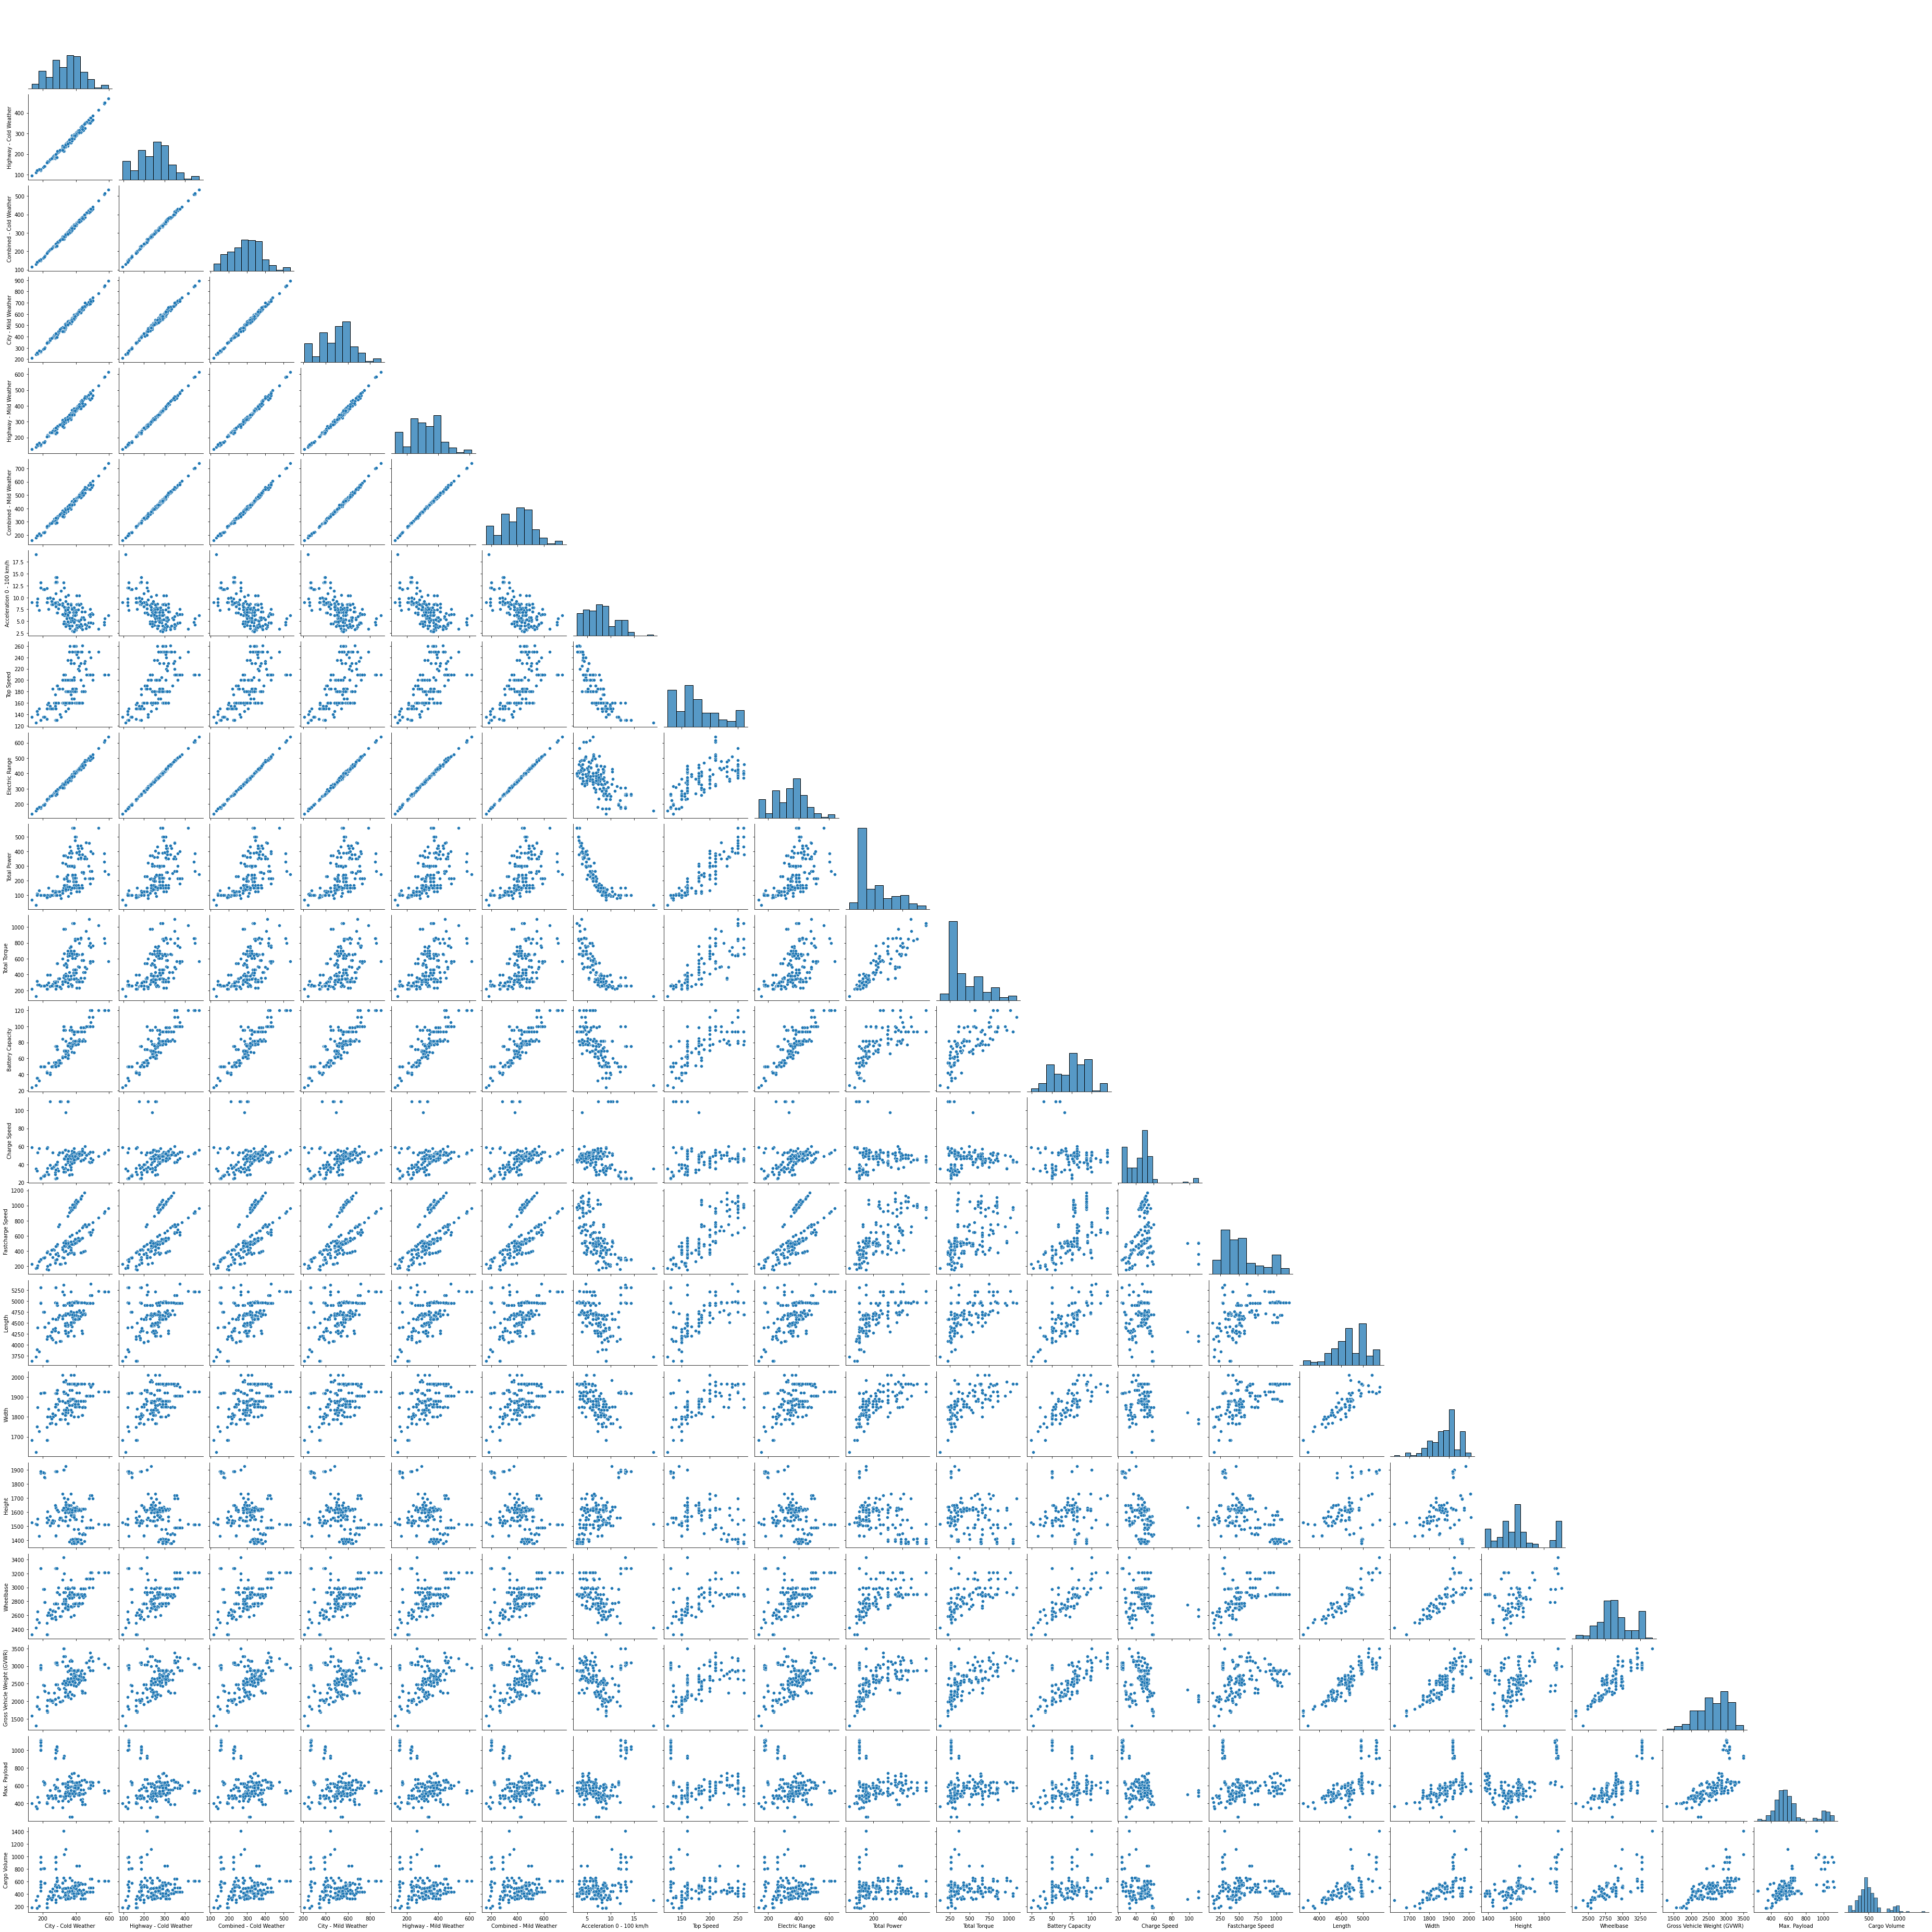

In [16]:
sns.pairplot(df[numerical_feature],corner=True)

####Due to a lot of features its better to open this image in a different tab and go through each one by one 

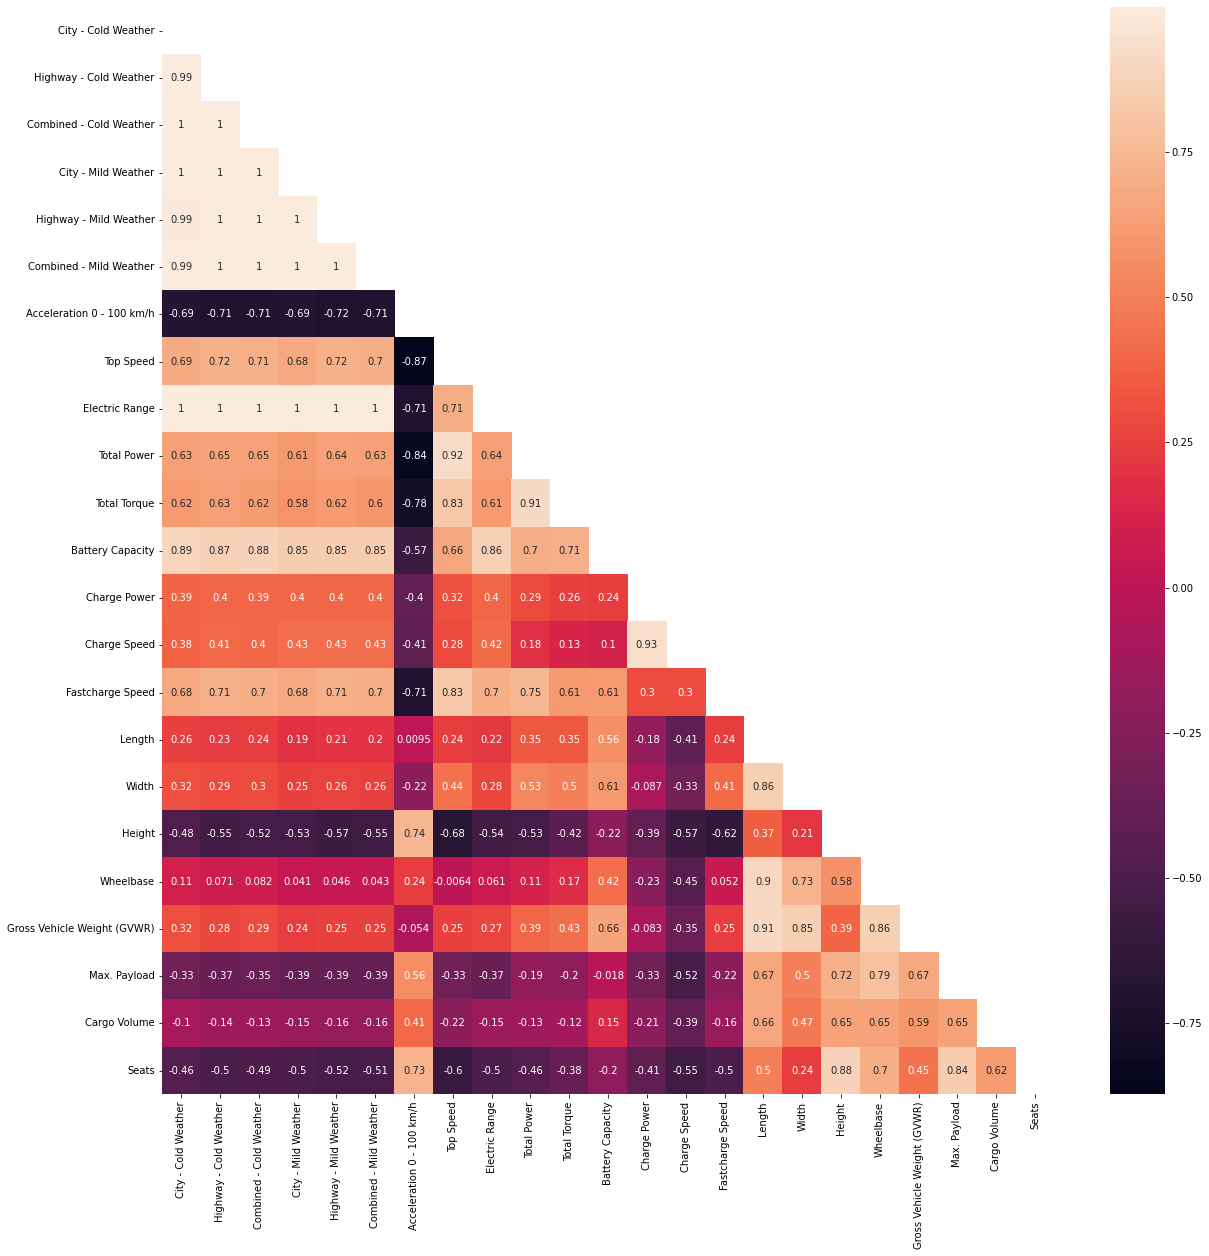

In [25]:
plt.figure(figsize=(20,20))
mask=np.triu(np.ones_like(df.corr()))
sns.heatmap(df.corr(),annot=True,mask=mask)

###Observation
####1) Battery Capacity and all Range features i.e [Cold,Mild] in [City,highway,combined] along with Electric Range have strong corelation 
####2)Similarly Total Torque and Total power have good corelation with all the range features.
####3)Acceleration is affected by the height of the car and no. of seats.
####4)Top speed has strong corelation with total power and good corelation with Total Torque 
####5)Electric Range and Battery Capactiy have strong corelation and it is no brainer
####6) Total power and total torque have strong corelation and this is also obvious and no brainer relation.

####**Lets look at the range feature under cold and mild weather condition has there is a clause of Combined range featur**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

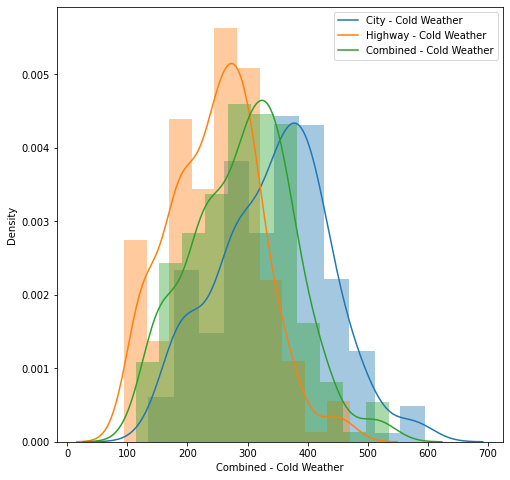

In [18]:
plt.figure(figsize=(8,8))
sns.distplot(df['City - Cold Weather'])
sns.distplot(df['Highway - Cold Weather'])
sns.distplot(df['Combined - Cold Weather'])
plt.legend(labels=['City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

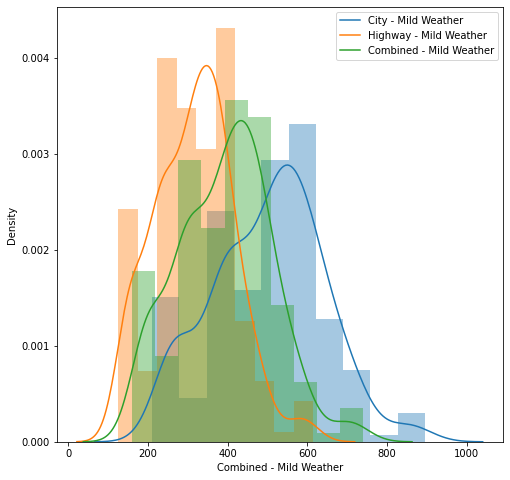

In [19]:
plt.figure(figsize=(8,8))
sns.distplot(df['City - Mild Weather'])
sns.distplot(df['Highway - Mild Weather'])
sns.distplot(df['Combined - Mild Weather'])
plt.legend(labels=['City - Mild Weather','Highway - Mild Weather','Combined - Mild Weather'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see th

<Figure size 576x576 with 0 Axes>

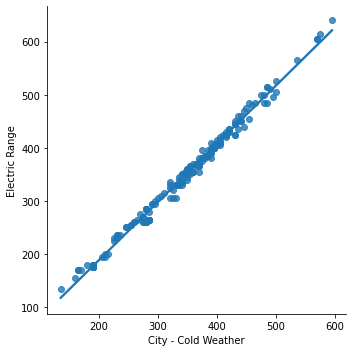

<Figure size 576x576 with 0 Axes>

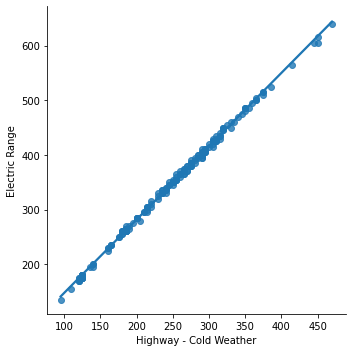

<Figure size 576x576 with 0 Axes>

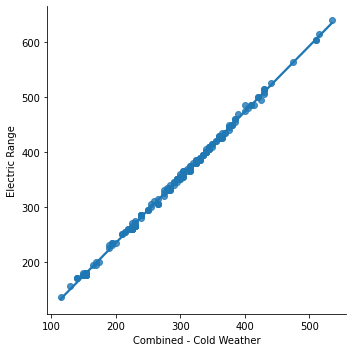

<Figure size 576x576 with 0 Axes>

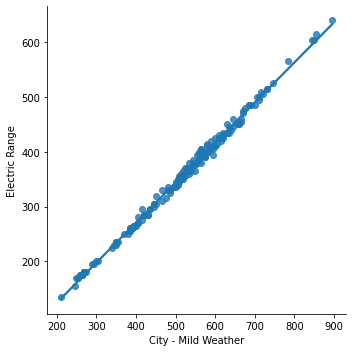

<Figure size 576x576 with 0 Axes>

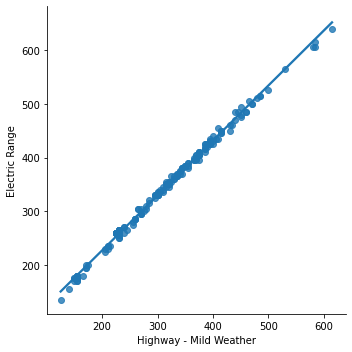

<Figure size 576x576 with 0 Axes>

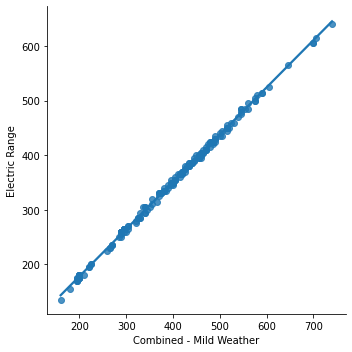

<Figure size 576x576 with 0 Axes>

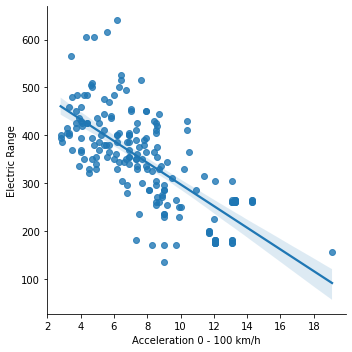

<Figure size 576x576 with 0 Axes>

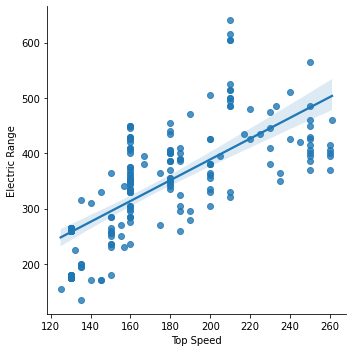

<Figure size 576x576 with 0 Axes>

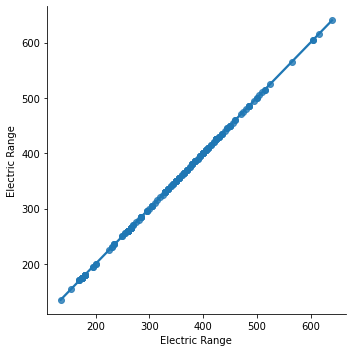

<Figure size 576x576 with 0 Axes>

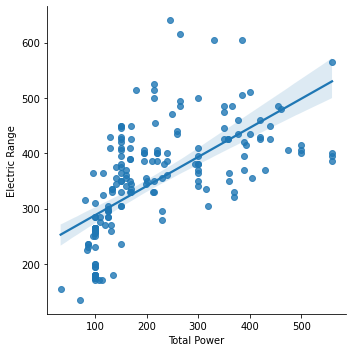

<Figure size 576x576 with 0 Axes>

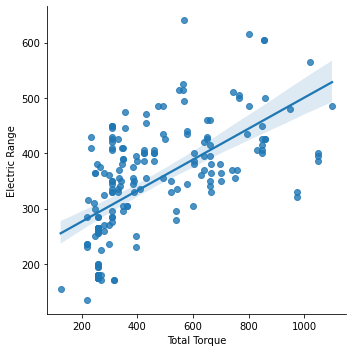

<Figure size 576x576 with 0 Axes>

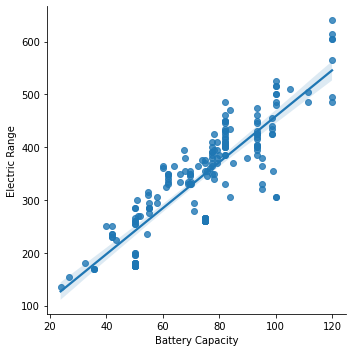

<Figure size 576x576 with 0 Axes>

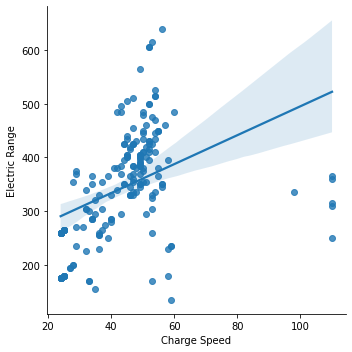

<Figure size 576x576 with 0 Axes>

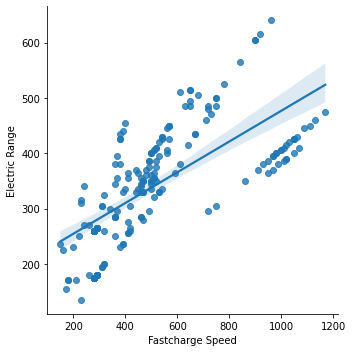

<Figure size 576x576 with 0 Axes>

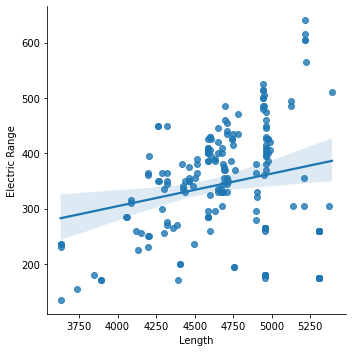

<Figure size 576x576 with 0 Axes>

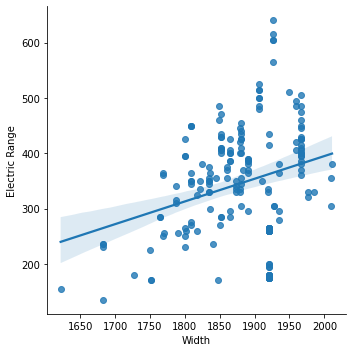

<Figure size 576x576 with 0 Axes>

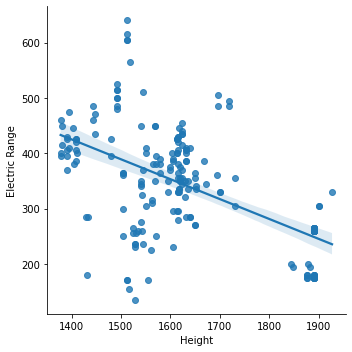

<Figure size 576x576 with 0 Axes>

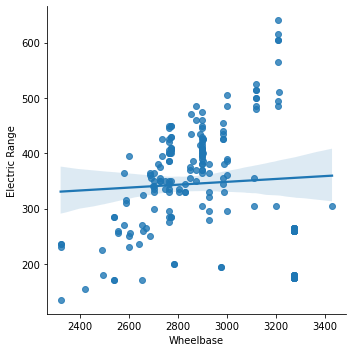

<Figure size 576x576 with 0 Axes>

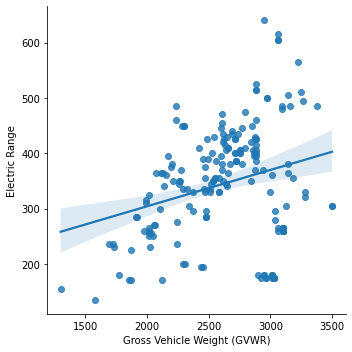

<Figure size 576x576 with 0 Axes>

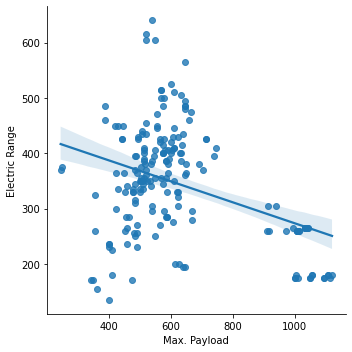

<Figure size 576x576 with 0 Axes>

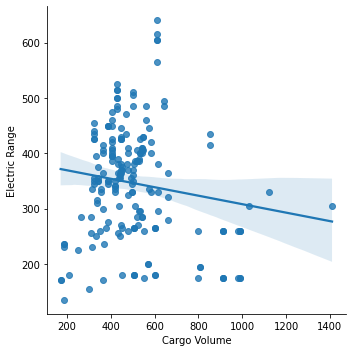

In [20]:
for feature in numerical_feature:
  plt.figure(figsize=(8,8))
  sns.lmplot(x=feature,y='Electric Range',data=df)
  plt.xlabel(feature)
  plt.ylabel('Electric Range')

#**Encoding the categorical Feature**

In [30]:
print(df['Drive'].unique())
drive_map={'Rear':1, 'AWD':2, 'Front':3}
df['Drive']=df['Drive'].map(drive_map)
print(df['Drive'].unique())

['Rear' 'AWD' 'Front']
[1 2 3]


#**Train Test Split**

In [36]:
X=df.drop(['Make','Electric Range'],axis=1)
y=df['Electric Range']

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [40]:
print(X_train.shape)
print(X_test.shape)

(155, 23)
(39, 23)


#**Feature Scaling** 

In [41]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [45]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)



#**ML Algorithm without Feature Selection**

##**Linear Regression**

In [47]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [59]:
LR.fit(scaled_X_train,y_train)

LinearRegression()

In [60]:
pred=LR.predict(scaled_X_test)

In [68]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,pred)
print("R squared {}".format(r2))

R squared 0.9995491325759404


In [67]:
n=39 #no of sample observations
k=23 #no. of independent features
adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print("Adjusted R squared {}".format(adj_r2_score))

Adjusted R squared 0.9988578025257155


##**XGBoost**

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
XG=GradientBoostingRegressor()

In [86]:
XG.fit(scaled_X_train,y_train)

GradientBoostingRegressor()

In [87]:
XG_pred=XG.predict(scaled_X_test)

In [88]:
r2 = r2_score(y_test,XG_pred)
print("R squared {}".format(r2))

R squared 0.9980594927412908


#Both the alogrithm seem to work good on this dataset , but this dataset doesnt high number of records. It will be good to try it on a large dataset